In [1]:
import sys, os
sys.path.append(f'../../code')
path_to_json = os.getcwd()

from IPython.display import display, Markdown

In [2]:
import json
def load_case(path):
    display(Markdown(f'## {path}'))
    with open(path, 'r+') as file: bundle = json.load(file)
    print('Temperature:', bundle['temperature'])
    return bundle

display(Markdown('# Files'))
json_files_mc = sorted([pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json') and pos_json.startswith('mc-hT')],
                       reverse = True)
json_files_alg1 = sorted([pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json') and pos_json.startswith('a1-hT')],
                         reverse = True)

json_files_alg2 = sorted([pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json') and pos_json.startswith('a2-hT')],
                         reverse = True)

print("MC: ", json_files_mc)
print("A1: ", json_files_alg1)
print("A2: ", json_files_alg2)

mc = load_case(json_files_mc[0])
alg1 = load_case(json_files_alg1[0])
alg2 = load_case(json_files_alg2[0])

# Files

MC:  ['mc-hT.json']
A1:  ['a1-hT.json']
A2:  ['a2-hT.json']


## mc-hT.json

Temperature: 10


## a1-hT.json

Temperature: 10


## a2-hT.json

Temperature: 10


Generating theoretical configurations: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 9657.34it/s]


[18277.361459400294, 73510.09064925133, 8212.547891348364]


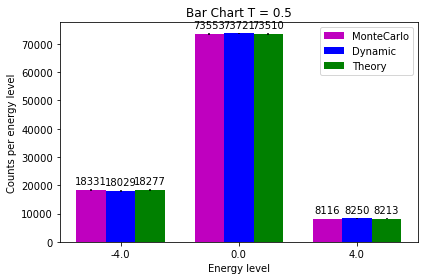

In [3]:
import ising
from ising import *
import matplotlib.pyplot as plt

mc_m_counts = count_variables(mc["magnetization_sample"])
alg1_m_counts = count_variables(alg1["magnetization_sample"])
mc_engy_counts = count_variables(mc["energy_sample"])
alg1_engy_counts = count_variables(alg1["energy_sample"])

chain = Chain(size=alg1["number of spins"], temperature = alg1["temperature"])
n_samples = len(alg1["energy_sample"])
theory_engy, theory_m = theoretical_distributions(chain)
theory_engy_counts, multinom_avg, multinom_std = theoretical_quantities(n_samples, theory_engy)
multiplicity_mc, std_mc, mc_engy_counts = std_algorithms(mc_engy_counts, multinom_avg, theory_engy, multinom_std)
multiplicity_alg1, std_alg1, alg1_engy_counts = std_algorithms(alg1_engy_counts, multinom_avg, theory_engy, multinom_std)


fig, ax = plt.subplots()
labels = mc_engy_counts.keys()
x = np.arange(len(labels)) 
width = 0.25
rects1 = ax.bar(x, list(mc_engy_counts.values()), width, yerr=std_mc, align='center',
                label='MonteCarlo', color='m')
rects2 = ax.bar(x + width, list(alg1_engy_counts.values()), width, yerr=std_alg1, align='center',
                label='Dynamic', color='b')
print(theory_engy_counts)
theory_engy_counts_adjusted = [round(counts) for counts in theory_engy_counts]
rects3 = ax.bar(x + width * 2, theory_engy_counts_adjusted, width, yerr=multinom_std, align='center',
                label='Theory', color='g')

ax.set_title('Bar Chart T = 0.5')
ax.set_ylabel('Counts per energy level')
ax.set_xlabel('Energy level')
ax.set_xticks(x + width)
ax.set_xticklabels([i for i in labels])
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

[18277.361459400294, 73510.09064925133, 8212.547891348364]


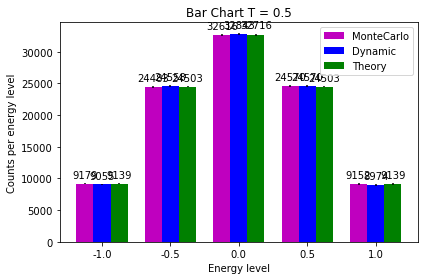

In [4]:
theory_m_counts, multinom_avg, multinom_std = theoretical_quantities(n_samples, theory_m)
multiplicity_mc, std_mc, mc_m_counts = std_algorithms(mc_m_counts, multinom_avg, theory_m, multinom_std)
multiplicity_alg1, std_alg1, alg1_m_counts = std_algorithms(alg1_m_counts, multinom_avg, theory_m, multinom_std)

fig, ax = plt.subplots()
labels = mc_m_counts.keys()
x = np.arange(len(labels)) 
width = 0.25
rects1 = ax.bar(x, list(mc_m_counts.values()), width, yerr=std_mc, align='center',
                label='MonteCarlo', color='m')
rects2 = ax.bar(x + width, list(alg1_m_counts.values()), width, yerr=std_alg1, align='center',
                label='Dynamic', color='b')
print(theory_engy_counts)
theory_m_counts_adjusted = [round(counts) for counts in theory_m_counts]
rects3 = ax.bar(x + width * 2, theory_m_counts_adjusted, width, yerr=multinom_std, align='center',
                label='Theory', color='g')

ax.set_title('Bar Chart T = 0.5')
ax.set_ylabel('Counts per energy level')
ax.set_xlabel('Energy level')
ax.set_xticks(x + width)
ax.set_xticklabels([i for i in labels])
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
fig.tight_layout()

Text(0.5, 1.0, 'M Correlation MonteCarlo')

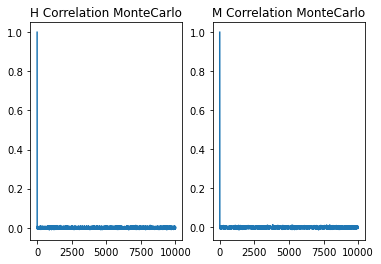

In [5]:
mc_engy_corr = acrl(mc["energy_sample"], 10000)
mc_m_corr = acrl(mc["magnetization_sample"], 10000)
fig_kde, axes = plt.subplots(1, 2)
axes[0].plot(mc_engy_corr)
axes[0].set_title("H Correlation MonteCarlo")
axes[1].plot(mc_m_corr)
axes[1].set_title("M Correlation MonteCarlo")

Text(0.5, 1.0, 'M Correlation Alg1')

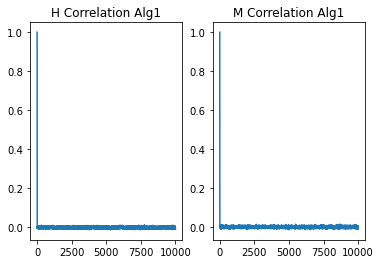

In [6]:
alg1_engy_corr = acrl(alg1["energy_sample"], 10000)
alg1_m_corr = acrl(alg1["magnetization_sample"], 10000)
fig_kde, axes = plt.subplots(1, 2)
axes[0].plot(alg1_engy_corr)
axes[0].set_title("H Correlation Alg1")
axes[1].plot(alg1_m_corr)
axes[1].set_title("M Correlation Alg1")

In [7]:
from lrtest import *
display(Markdown("# Chi2 test one sample"))
print(f'H0: the sample comes from the same distribution of the theoretical one')
mc_engy = list(mc_engy_counts.values())
alg1_engy = list(alg1_engy_counts.values())
mc_m = list(mc_m_counts.values())
alg1_m = list(alg1_m_counts.values())
print(f'Energy MC:', one_sample_chi_squared(theory_engy[:,1], mc_engy))
print(f'Energy Alg1:', one_sample_chi_squared(theory_engy[:,1], alg1_engy))
print(f'Magnetization MC:', one_sample_chi_squared(theory_m[:,1], mc_m))
print(f'Magnetization Alg1:', one_sample_chi_squared(theory_m[:,1], alg1_m))

# Chi2 test one sample

H0: the sample comes from the same distribution of the theoretical one
Energy MC: 0.5175001664750534
Energy Alg1: 0.1255079338733661
Magnetization MC: 0.9512600132519862
Magnetization Alg1: 0.3389399349149915


In [8]:
from lrtest import one_sample_test
display(Markdown("# Loglikelihood ratio test one sample"))
print(f'H0: the sample comes from the same distribution of the theoretical one')
mc_engy = list(mc_engy_counts.values())
alg1_engy = list(alg1_engy_counts.values())
mc_m = list(mc_m_counts.values())
alg1_m = list(alg1_m_counts.values())
print(f'Energy MC:', one_sample_test(theory_engy[:,1], mc_engy))
print(f'Energy Alg1:', one_sample_test(theory_engy[:,1], alg1_engy))
print(f'Magnetization MC:', one_sample_test(theory_m[:,1], mc_m))
print(f'Magnetization Alg1:', one_sample_test(theory_m[:,1], alg1_m))

# Loglikelihood ratio test one sample

H0: the sample comes from the same distribution of the theoretical one
Energy MC: 0.5163898403933616
Energy Alg1: 0.12460181260287401
Magnetization MC: 0.9512758184870116
Magnetization Alg1: 0.33666714050930513


In [9]:
from two_samples import chi_squared_test
display(Markdown("# Chi2 test two sample"))
print(f'H0: the two sample comes from the same distribution')
mc_engy = list(mc_engy_counts.values())
alg1_engy = list(alg1_engy_counts.values())
mc_m = list(mc_m_counts.values())
alg1_m = list(alg1_m_counts.values())
print(f'Energy :', chi_squared_test(mc_engy, alg1_engy))
print(f'Magnetization :', chi_squared_test(mc_m, alg1_m))

# Chi2 test two sample

H0: the two sample comes from the same distribution
Energy : 0.022691382757539704
Magnetization : 0.13873056886951307


# Alg2

Generating theoretical configurations: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 30997.17it/s]


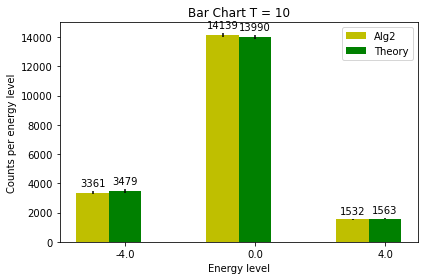

In [10]:
display(Markdown("# Alg2"))

alg2_engy_counts = count_variables(alg2["energy_sample"])
alg2_engy = list(alg2_engy_counts.values())
theory_engy, theory_m = theoretical_distributions(chain)
theory_engy_counts, multinom_avg, multinom_std = theoretical_quantities(len(alg2["energy_sample"]), theory_engy)
multiplicity_alg2, std_alg2, alg2_engy_counts = std_algorithms(alg2_engy_counts, multinom_avg, theory_engy, multinom_std)
fig, ax = plt.subplots()
labels = alg1_engy_counts.keys()
x = np.arange(len(labels)) 
width = 0.25
rects1 = ax.bar(x , list(alg2_engy_counts.values()), width, yerr=std_alg2, align='center',
                label='Alg2', color='y')
theory_engy_counts_adjusted = [round(counts) for counts in theory_engy_counts]
rects2 = ax.bar(x + width, theory_engy_counts_adjusted, width, yerr=multinom_std, align='center',
                label='Theory', color='g')

ax.set_title('Bar Chart T = 10')
ax.set_ylabel('Counts per energy level')
ax.set_xlabel('Energy level')
ax.set_xticks(x + width)
ax.set_xticklabels([i for i in labels])
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()

Generating theoretical configurations: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 16093.25it/s]


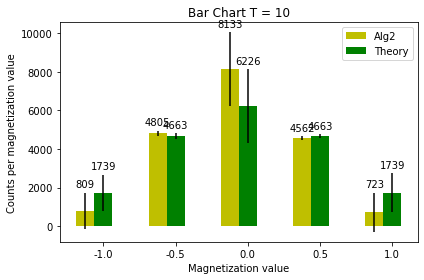

In [11]:
alg2_m_counts = count_variables(alg2["magnetization_sample"])
alg2_m = list(alg2_m_counts.values())
theory_engy, theory_m = theoretical_distributions(chain)
theory_m_counts, multinom_avg, multinom_std = theoretical_quantities(len(alg2["magnetization_sample"]), theory_m)
multiplicity_alg2, std_alg2, alg2_m_counts = std_algorithms(alg2_m_counts, multinom_avg, theory_m, multinom_std)
fig, ax = plt.subplots()
labels = alg2_m_counts.keys()
x = np.arange(len(labels)) 
width = 0.25
rects1 = ax.bar(x , list(alg2_m_counts.values()), width, yerr=std_alg2, align='center',
                label='Alg2', color='y')
theory_m_counts_adjusted = [round(counts) for counts in theory_m_counts]
rects2 = ax.bar(x + width, theory_m_counts_adjusted, width, yerr=multinom_std, align='center',
                label='Theory', color='g')

ax.set_title('Bar Chart T = 10')
ax.set_ylabel('Counts per magnetization value')
ax.set_xlabel('Magnetization value')
ax.set_xticks(x + width)
ax.set_xticklabels([i for i in labels])
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()

Text(0.5, 1.0, 'M Correlation Alg1')

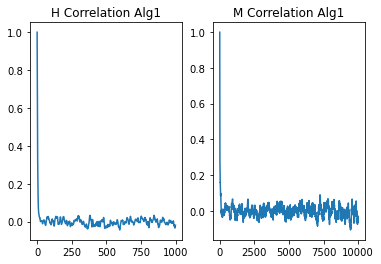

In [12]:
alg2_engy_corr = acrl(alg2["energy_sample"], 1000)
alg2_m_corr = acrl(alg2["magnetization_sample"], 10000)
fig_kde, axes = plt.subplots(1, 2)
axes[0].plot(alg2_engy_corr)
axes[0].set_title("H Correlation Alg1")
axes[1].plot(alg2_m_corr)
axes[1].set_title("M Correlation Alg1")

In [13]:
from lrtest import *
display(Markdown("# Chi2 test one sample - Alg2"))
print(f'H0: the sample comes from the same distribution of the theoretical one')
alg2_engy = list(alg2_engy_counts.values())
alg2_m = list(alg2_m_counts.values())
print(f'Energy Alg2:', one_sample_chi_squared(theory_engy[:,1], alg2_engy))
print(f'Magnetization Alg2:', one_sample_chi_squared(theory_m[:,1], alg2_m)) 

# Chi2 test one sample - Alg2

H0: the sample comes from the same distribution of the theoretical one
Energy Alg2: 0.04584460580195363
Magnetization Alg2: 0.0
